1. Import Libraries
2. Import Data
3. Data Exploration
4. Data Cleaning
5. Benchmark Model
   5.1. Train-Test split
   5.2. Fit a model to the data
   5.3. Model Evaluation
   5.4. Fix Problems
6. Feature Engineering
7. Model Training
   7.1. Decision Tree
   7.2. Random Forest - Overfit - Underfit
   7.3. Gradient Boosting
   7.4. Comparing algorithm perfomance
8. Tuning
   8.1. Find Best Parameters
9. Classification

### 0. Import Libraries

In [10]:
import pandas as pd
import numpy as np

%matplotlib inline

### 1. Import Data

In [11]:
taxi_jan_2024 = pd.read_csv('data/yellow-tripdata-2024-01.csv')
taxi_data = pd.concat([taxi_jan_2024])

c:\users\abhin\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (3,5,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
print(taxi_data.shape)
taxi_data.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-13 03:18:09.000000,2024-01-13 03:24:37.000000,1,2.31,1,N,48,68,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0
1,2,2024-01-13 03:52:58.000000,2024-01-13 04:01:18.000000,1,2.61,1,N,231,164,1,13.5,1.0,0.5,2.00,0.0,1.0,20.50,2.5,0.0
2,2,2024-01-13 03:26:02.000000,2024-01-13 03:34:43.000000,1,1.79,1,N,90,233,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0
3,2,2024-01-13 03:53:44.000000,2024-01-13 04:10:56.000000,1,6.58,1,N,141,244,1,27.5,1.0,0.5,6.50,0.0,1.0,39.00,2.5,0.0
4,2,2024-01-13 02:58:28.000000,2024-01-13 03:14:33.000000,1,3.40,1,N,79,246,1,18.4,1.0,0.5,4.68,0.0,1.0,28.08,2.5,0.0


### 2. Data Exploration

In [13]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [14]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
                       'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [15]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-13 03:18:09.000000,2024-01-13 03:24:37.000000,1,2.31,1,48,68,1,19.68
1,2024-01-13 03:52:58.000000,2024-01-13 04:01:18.000000,1,2.61,1,231,164,1,20.50
2,2024-01-13 03:26:02.000000,2024-01-13 03:34:43.000000,1,1.79,1,90,233,1,19.68
3,2024-01-13 03:53:44.000000,2024-01-13 04:10:56.000000,1,6.58,1,141,244,1,39.00
4,2024-01-13 02:58:28.000000,2024-01-13 03:14:33.000000,1,3.40,1,79,246,1,28.08


array([[<AxesSubplot:title={'center':'trip_distance'}>,
        <AxesSubplot:title={'center':'PULocationID'}>],
       [<AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'total_amount'}>, <AxesSubplot:>]],
      dtype=object)

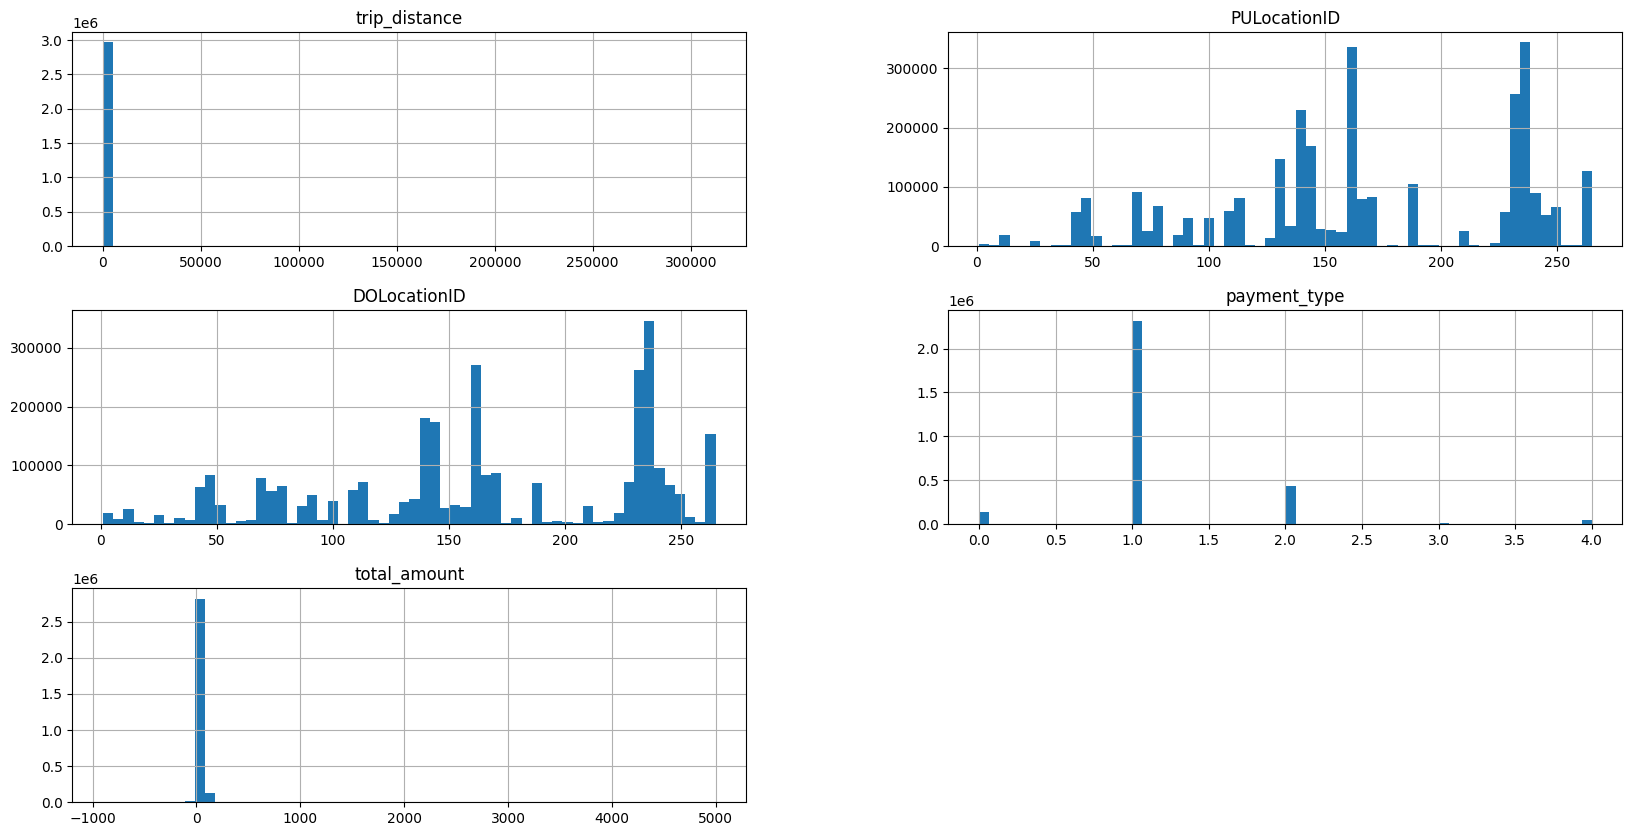

In [16]:
taxi_data.hist(figsize= (20,10), bins = 60)

In [17]:
taxi_data['RatecodeID'].value_counts()

1     2657230
\N     140162
2       98515
99      28662
5       19349
3        7944
4        6341
1        6120
2         198
5          61
4          24
3          10
6           7
99          1
Name: RatecodeID, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

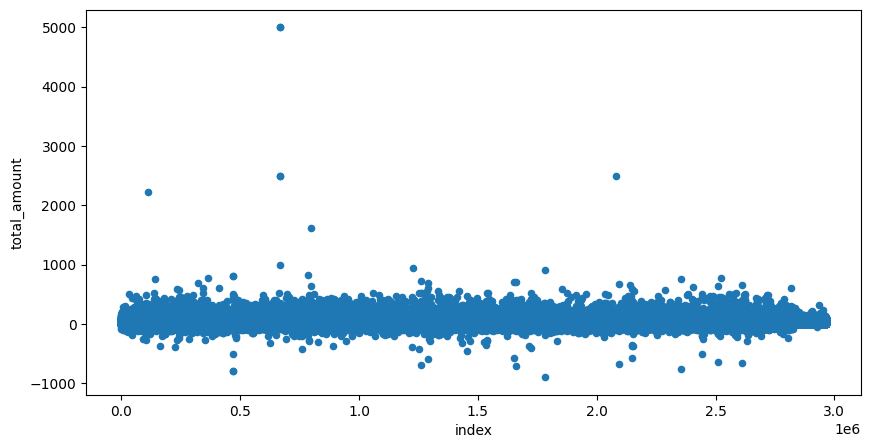

In [18]:
taxi_data.reset_index().plot(kind = 'scatter', y = 'total_amount', x = 'index', figsize= (10, 5))

<AxesSubplot:xlabel='index', ylabel='total_amount'>

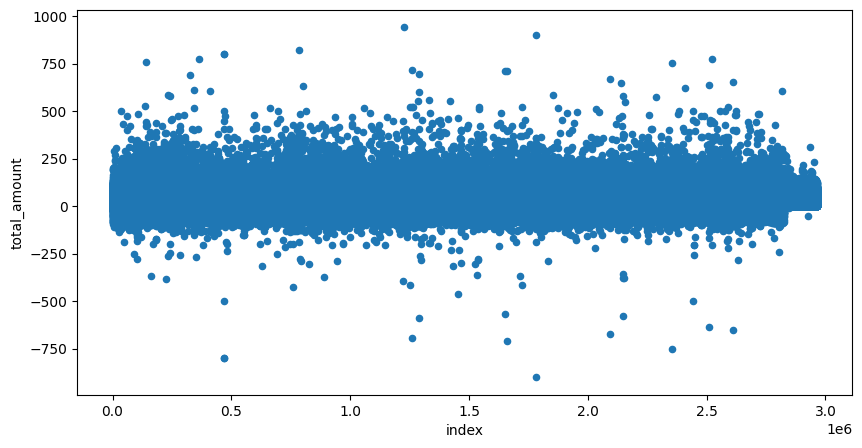

In [19]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind = 'scatter', y = 'total_amount', x = 'index', figsize = (10, 5))

(35504, 9)


<AxesSubplot:xlabel='index', ylabel='total_amount'>

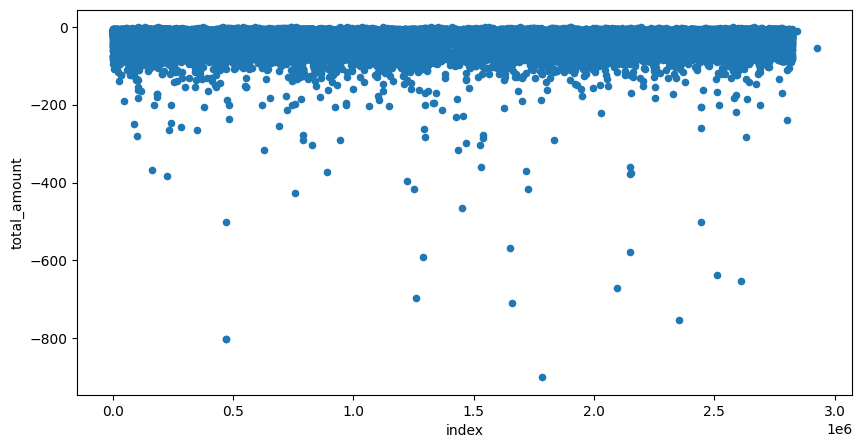

In [20]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind = 'scatter', y = "total_amount", x = 'index', figsize = (10,5))

In [22]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
18,2024-01-13 03:39:41.000000,2024-01-13 03:59:26.000000,1,3.61,1,48,145,4,-20.18
102,2024-01-13 03:04:52.000000,2024-01-13 03:08:22.000000,4,0.35,1,230,48,4,-10.10
166,2024-01-13 03:30:09.000000,2024-01-13 03:31:44.000000,2,0.04,1,141,141,4,-8.70
184,2024-01-13 03:39:11.000000,2024-01-13 04:02:41.000000,1,10.82,1,230,241,4,-49.30
225,2024-01-13 03:59:41.000000,2024-01-13 04:26:35.000000,1,1.69,1,141,237,4,-27.60


In [23]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

4    21406
2     8326
3     5741
1       29
0        2
Name: payment_type, dtype: int64

<AxesSubplot:>

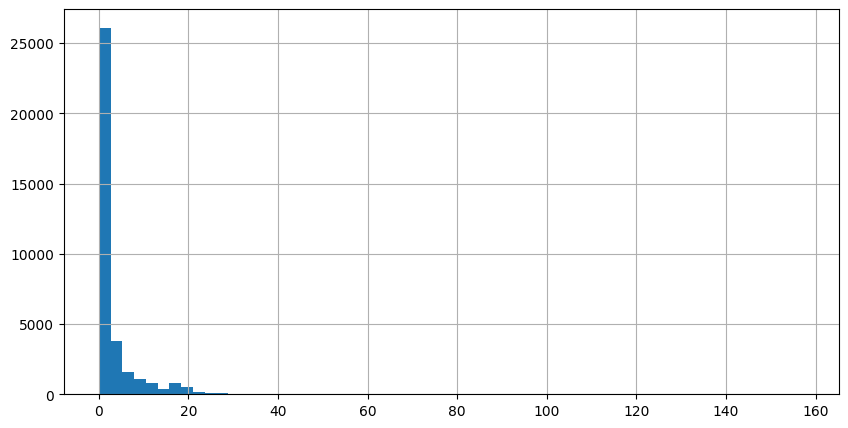

In [24]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins = 60, figsize = (10,5))

In [25]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(416, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
6326,2024-01-13 09:29:14.000000,2024-01-13 09:32:54.000000,1,0.3,1,107,137,4,0.0
28271,2024-01-13 13:55:51.000000,2024-01-13 13:56:01.000000,1,0.0,1,264,264,1,0.0
37725,2024-01-13 15:40:32.000000,2024-01-13 15:40:32.000000,1,0.0,5,216,264,2,0.0
46974,2024-01-13 16:10:36.000000,2024-01-13 16:10:36.000000,1,0.0,1,264,264,2,0.0
46975,2024-01-13 16:10:36.000000,2024-01-13 16:18:44.000000,1,0.0,1,264,264,1,0.0


In [26]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

1    129
4    128
3     83
2     65
0     11
Name: payment_type, dtype: int64

<AxesSubplot:>

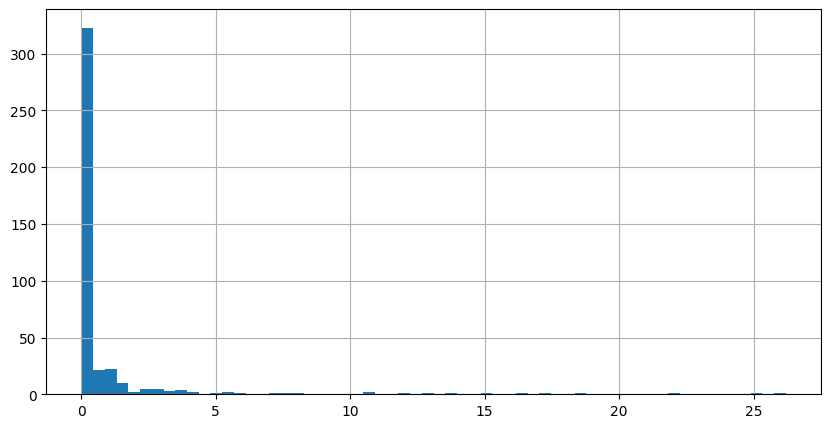

In [27]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins = 60, figsize=(10,5))

In [28]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

0.00     287
0.10      21
0.20       8
0.90       8
0.50       7
1.60       6
1.00       5
0.70       5
0.80       5
0.30       4
1.30       4
1.10       4
0.60       4
2.50       3
3.00       3
0.40       3
1.80       2
3.80       2
1.70       2
3.40       2
2.40       2
10.70      2
5.80       1
17.10      1
2.90       1
18.40      1
25.10      1
12.10      1
1.40       1
12.80      1
1.74       1
15.00      1
4.20       1
3.30       1
8.10       1
4.90       1
2.70       1
1.20       1
5.50       1
5.30       1
4.00       1
21.90      1
16.50      1
3.50       1
26.20      1
13.60      1
7.70       1
3.60       1
7.00       1
Name: trip_distance, dtype: int64

<AxesSubplot:xlabel='index', ylabel='total_amount'>

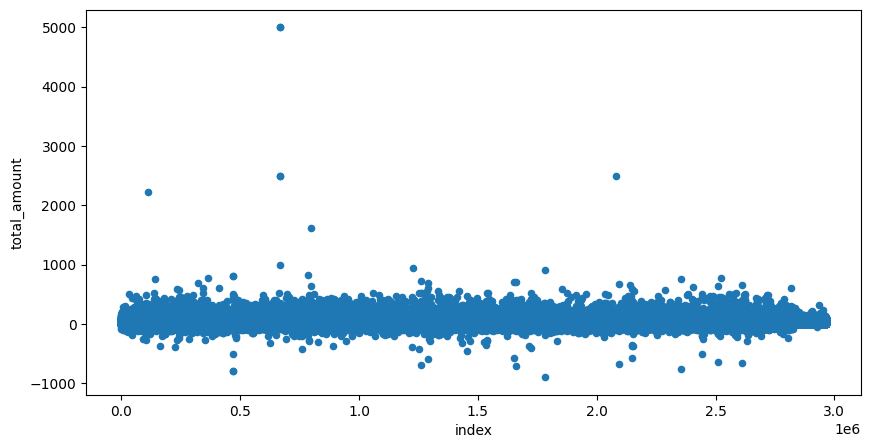

In [29]:
taxi_data.reset_index().plot(kind = 'scatter', y = 'total_amount', x = 'index', figsize = (10,5))

In [34]:
taxi_data[taxi_data['total_amount']>200].shape

(2005, 9)

In [35]:
taxi_data['total_amount'].mean()

26.80150477092542

### 3. Data Cleaning

In [36]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>0)&(taxi_data['total_amount']<200)]

In [37]:
print(taxi_data.shape)
taxi_data_filtered.shape

(2964624, 9)


(2926691, 9)

In [38]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

### 4. Data Preparation

In [39]:
taxi_data_prepared = taxi_data_filtered.copy()

In [40]:
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count           object
trip_distance            float64
RatecodeID                object
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [41]:
taxi_data_prepared.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_pickup_datetime'])
taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'])

In [42]:
taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:, 'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [43]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                  object
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [44]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared.loc[:, 'transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared.loc[:, 'transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared.loc[:, 'transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared.loc[:, 'transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [45]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-13 03:18:09,2024-01-13 03:24:37,1,2.31,1,48,68,1,19.68,2024-01-13,2024,1,13,3
1,2024-01-13 03:52:58,2024-01-13 04:01:18,1,2.61,1,231,164,1,20.50,2024-01-13,2024,1,13,3
2,2024-01-13 03:26:02,2024-01-13 03:34:43,1,1.79,1,90,233,1,19.68,2024-01-13,2024,1,13,3
3,2024-01-13 03:53:44,2024-01-13 04:10:56,1,6.58,1,141,244,1,39.00,2024-01-13,2024,1,13,3
4,2024-01-13 02:58:28,2024-01-13 03:14:33,1,3.40,1,79,246,1,28.08,2024-01-13,2024,1,13,2


array([[<AxesSubplot:title={'center':'tpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'tpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'trip_distance'}>],
       [<AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'transaction_date'}>,
        <AxesSubplot:title={'center':'transaction_year'}>],
       [<AxesSubplot:title={'center':'transaction_month'}>,
        <AxesSubplot:title={'center':'transaction_day'}>,
        <AxesSubplot:title={'center':'transaction_hour'}>]], dtype=object)

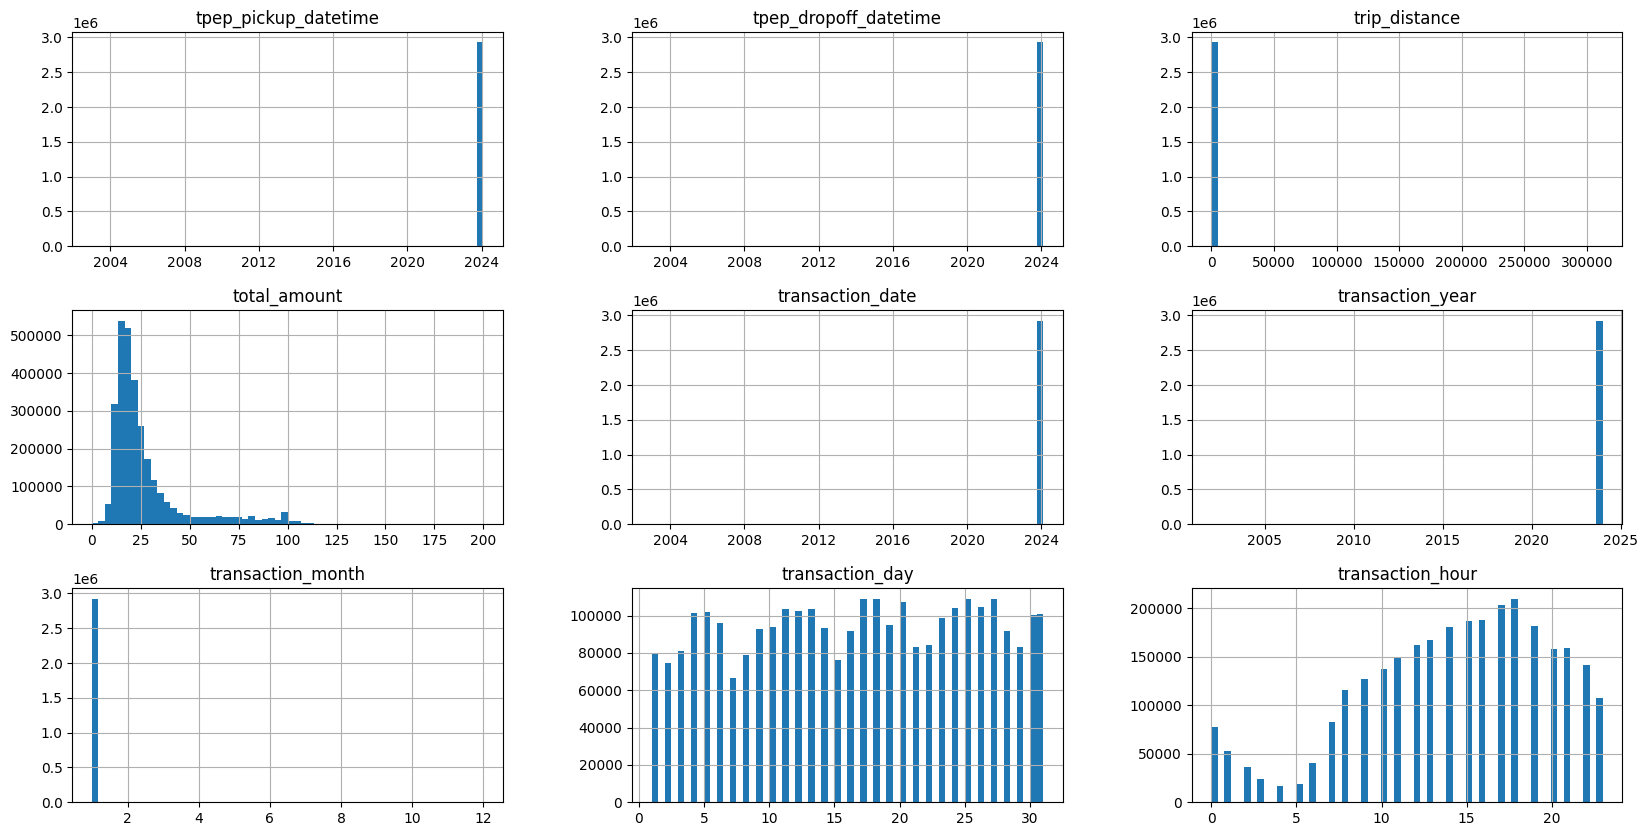

In [46]:
taxi_data_prepared.hist(figsize = (20,10), bins = 60)

In [47]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2024]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

In [48]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [49]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2926674, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,48,2024-01-13,1,13,3,2.31,19.68
1,231,2024-01-13,1,13,3,2.61,20.50
2,90,2024-01-13,1,13,3,1.79,19.68
3,141,2024-01-13,1,13,3,6.58,39.00
4,79,2024-01-13,1,13,2,3.40,28.08


In [50]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(77408, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


<AxesSubplot:>

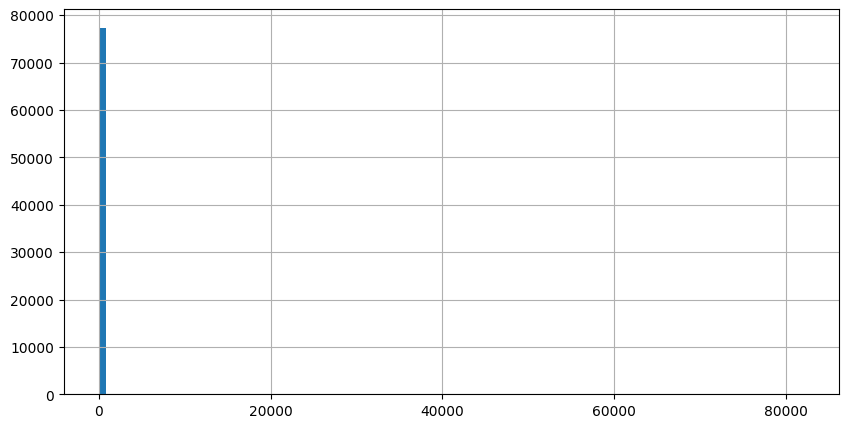

In [52]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize = (10,5))

In [ ]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize = (10,5))

### Benchmark Model